# Task

Explore the Titanic CSV dataset from Kaggle. Clean the data by introducing dummy variables where necessary and decide how to treat nulls and outliers. Use Exploratory Data Analysis to investigate correlation and identify the best features to include in a model. Use different classification algorithms to predict which people survived and calculate accuracy to choose the best model. 

In [1]:
#Read in the file using pandas
import pandas as pd

In [2]:
#Read the file into a dataframe
df = pd.read_csv("titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Use the info function to see the features of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


There are 891 rows and 15 columns in the data set. There are lots of missing values in deck column and some in age, embarked and embark_town. Let's confirm using isna.

In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Age shouldn't be skewed so I think replace with mean. Use describe to see summary statistics for each column. 

In [5]:
df.describe(include = "all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mean and median aren't that different in the age column so replace null values in age with mean. 

In [6]:
df['age'] = df['age'].fillna(df['age'].mean())

Replace nulls in embark_town and embarked with most common value. There are only 2 null values anyway so shouldn't have much impact. Value count to see which is the most common.

In [7]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [8]:
df['embark_town'] = df['embark_town'].fillna('Southampton')

In [9]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [10]:
df['embarked'] = df['embarked'].fillna('S')

We should only have nulls in deck remaining. Let's double check. 

In [11]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

Let's value count on deck to see how many of each we have. 

In [12]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

There is no clear result here and not enough information to make a decision of what to replace nulls with. Won't use deck in model at all, drop the column.

In [13]:
df.drop(columns=['deck'], inplace=True)

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


There may be outliers in age and fare. Let's have a look at their boxplots.

In [15]:
#import visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

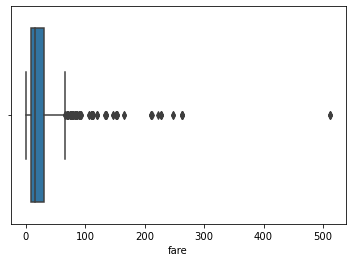

In [16]:
sns.boxplot(df['fare'])

Fare does have outliers. There are different techniques we can use to treat outliers. Let's try removing those above the upper whisker : Q3 + (1.5 * IQR). To do that introduce a function. 

In [17]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    return upper_whisker, lower_whisker

In [18]:
upper, lower = outliers(df, "fare")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  65.6344
Lower Whisker:  -26.724


Can't pay a minus fare so just need to remove fares above the upperwhisker. Create a new dataframe with outlier fares removed.

In [19]:
df2 = df[(df['fare'] < upper)]

Double check that there's no maximum fare above 65.

In [20]:
df2.describe()

,survived,pclass,age,sibsp,parch,fare
count,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,0.339355,2.48000,29.103880,0.437419,0.340645,17.822091
std,0.473796,0.73439,12.779988,0.899838,0.785914,13.578085
min,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.00000,29.699118,0.000000,0.000000,13.000000
75%,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


Let's see whether age has outliers using a box plot.

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

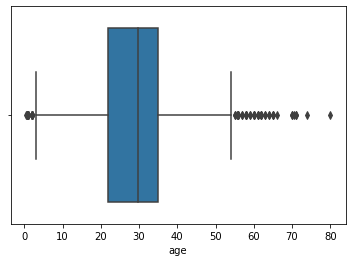

In [21]:
sns.boxplot(df['age'])

Call the outliers function again, this time on age. 

In [22]:
upper2, lower2 = outliers(df, "age")
print("Upper whisker: ", upper2)
print("Lower Whisker: ", lower2)

Upper whisker:  54.5
Lower Whisker:  2.5


There could be a baby less than 2.5 years old so need to remove values both above upper whisker and below lower whisker. Create a new dataframe to do so. 

In [23]:
df3 = df2[(df2['age'] > lower2) & (df['age'] < upper2)]

<ipython-input-23-919f1d1f2d03>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[(df2['age'] > lower2) & (df['age'] < upper2)]


Let's check whether max age is less than 55.

In [24]:
df3.describe()

,survived,pclass,age,sibsp,parch,fare
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.337032,2.509015,28.476085,0.414702,0.323162,17.389845
std,0.473024,0.717046,10.043466,0.853916,0.788549,13.563036
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,12.275000
75%,1.000000,3.000000,33.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,65.000000


Some of the columns are duplicates. For example, survived is the same as alive, pclass same as class and embarked same as embark_town. Drop columns from model. 

In [25]:
df3.drop(columns=['alive', 'class', 'embarked'], inplace=True)
df3.head()

C:\Users\44784\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,man,True,Southampton,False
2,1,3,female,26.000000,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,man,True,Southampton,True
5,0,3,male,29.699118,0,0,8.4583,man,True,Queenstown,True


I now need to change non-numeric values to numeric so that the classfication algorithms will work. Because there's only two values for sex I can map male to 0 and female to 1. 

In [26]:
df3['sex'].value_counts()

male      490
female    231
Name: sex, dtype: int64

In [29]:
df3['sex'] = df3['sex'].map({'male': 0, 'female': 1})

<ipython-input-29-c9093207177e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sex'] = df3['sex'].map({'male': 0, 'female': 1})


double check value count is same as before

In [30]:
df3['sex'].value_counts()

0    490
1    231
Name: sex, dtype: int64

Because there's only two values for adult_male can map False to 0 and True to 1.

In [31]:
df3['adult_male'].value_counts()

True     466
False    255
Name: adult_male, dtype: int64

In [32]:
df3['adult_male'] = df3['adult_male'].map({False: 0, True: 1})

<ipython-input-32-9e9e6e3e5546>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['adult_male'] = df3['adult_male'].map({False: 0, True: 1})


In [33]:
df3['adult_male'].value_counts()

1    466
0    255
Name: adult_male, dtype: int64

Because there's only two values for alone can map False to 0 and True to 1.

In [34]:
df3['alone'].value_counts()

True     473
False    248
Name: alone, dtype: int64

In [35]:
df3['alone'] = df3['alone'].map({False: 0, True: 1})

<ipython-input-35-9672b4cdc341>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alone'] = df3['alone'].map({False: 0, True: 1})


In [36]:
df3['alone'].value_counts()

1    473
0    248
Name: alone, dtype: int64

Now we need to dummy encode pclass, embarked and who columns because they don't have a numerical relationship. 

In [37]:
pclass_dummies = pd.get_dummies(df3.pclass, prefix='pclass')

pclass_dummies.sample(n=5, random_state=1)

,pclass_1,pclass_2,pclass_3
73,0,0,1
74,0,0,1
261,0,0,1
794,0,0,1
10,0,0,1


In [38]:
df_new = pd.concat([df3, pclass_dummies], axis=1)

df_new.sample(n=5, random_state=1)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,pclass_1,pclass_2,pclass_3
73,0,3,0,26.0,1,0,14.4542,man,1,Cherbourg,0,0,0,1
74,1,3,0,32.0,0,0,56.4958,man,1,Southampton,1,0,0,1
261,1,3,0,3.0,4,2,31.3875,child,0,Southampton,0,0,0,1
794,0,3,0,25.0,0,0,7.8958,man,1,Southampton,1,0,0,1
10,1,3,1,4.0,1,1,16.7000,child,0,Southampton,0,0,0,1


In [39]:
who_dummies = pd.get_dummies(df_new.who, prefix='who')

who_dummies.sample(n=5, random_state=1)

,who_child,who_man,who_woman
73,0,1,0
74,0,1,0
261,1,0,0
794,0,1,0
10,1,0,0


In [40]:
df_new2 = pd.concat([df_new, who_dummies], axis=1)

df_new2.sample(n=5, random_state=1)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,pclass_1,pclass_2,pclass_3,who_child,who_man,who_woman
73,0,3,0,26.0,1,0,14.4542,man,1,Cherbourg,0,0,0,1,0,1,0
74,1,3,0,32.0,0,0,56.4958,man,1,Southampton,1,0,0,1,0,1,0
261,1,3,0,3.0,4,2,31.3875,child,0,Southampton,0,0,0,1,1,0,0
794,0,3,0,25.0,0,0,7.8958,man,1,Southampton,1,0,0,1,0,1,0
10,1,3,1,4.0,1,1,16.7000,child,0,Southampton,0,0,0,1,1,0,0


In [41]:
embark_town_dummies = pd.get_dummies(df_new2.embark_town, prefix='embark_town')

embark_town_dummies.sample(n=5, random_state=1)

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
73,1,0,0
74,0,0,1
261,0,0,1
794,0,0,1
10,0,0,1


In [42]:
df_new3 = pd.concat([df_new2, embark_town_dummies], axis=1)

df_new3.sample(n=5, random_state=1)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,pclass_1,pclass_2,pclass_3,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
73,0,3,0,26.0,1,0,14.4542,man,1,Cherbourg,0,0,0,1,0,1,0,1,0,0
74,1,3,0,32.0,0,0,56.4958,man,1,Southampton,1,0,0,1,0,1,0,0,0,1
261,1,3,0,3.0,4,2,31.3875,child,0,Southampton,0,0,0,1,1,0,0,0,0,1
794,0,3,0,25.0,0,0,7.8958,man,1,Southampton,1,0,0,1,0,1,0,0,0,1
10,1,3,1,4.0,1,1,16.7000,child,0,Southampton,0,0,0,1,1,0,0,0,0,1


Now we have dummy encoded certain columns we need to remove the original columns.

In [43]:
df_new3.drop(columns=['pclass', 'who', 'embark_town'], inplace=True)

Let's look at correlations. 

In [44]:
df_new3.corr()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,pclass_3,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
survived,1.000000,0.510246,-0.065202,0.004221,0.079950,0.260557,-0.509719,-0.181697,0.190693,0.159077,-0.273426,0.126709,-0.509719,0.469201,0.088271,0.049935,-0.107121
sex,0.510246,1.000000,-0.095276,0.157456,0.295532,0.164606,-0.928177,-0.341287,-0.038991,0.145047,-0.099245,0.149804,-0.928177,0.902377,0.028306,0.122227,-0.108025
age,-0.065202,-0.095276,1.000000,-0.291564,-0.134218,0.092716,0.236474,0.160001,0.267064,0.070914,-0.250236,-0.579778,0.236474,0.091223,-0.025707,-0.023907,0.037692
sibsp,0.004221,0.157456,-0.291564,1.000000,0.392674,0.370951,-0.327212,-0.671161,-0.069183,-0.027185,0.072525,0.478770,-0.327212,0.065563,-0.048584,-0.018786,0.052926
parch,0.079950,0.295532,-0.134218,0.392674,1.000000,0.335415,-0.374004,-0.566367,-0.086906,0.029397,0.035582,0.313138,-0.374004,0.213736,0.000339,-0.064652,0.044567
fare,0.260557,0.164606,0.092716,0.370951,0.335415,1.000000,-0.210872,-0.479910,0.588229,0.065741,-0.472131,0.148552,-0.210872,0.137112,0.098557,-0.154345,0.026127
adult_male,-0.509719,-0.928177,0.236474,-0.327212,-0.374004,-0.210872,1.000000,0.423133,0.065176,-0.124546,0.062871,-0.388479,1.000000,-0.837566,-0.023554,-0.125489,0.106386
alone,-0.181697,-0.341287,0.160001,-0.671161,-0.566367,-0.479910,0.423133,1.000000,-0.011422,-0.087687,0.084668,-0.330876,0.423133,-0.255685,-0.065255,0.072727,0.003139
pclass_1,0.190693,-0.038991,0.267064,-0.069183,-0.086906,0.588229,0.065176,-0.011422,1.000000,-0.211382,-0.520290,-0.111949,0.065176,-0.003227,0.153047,-0.128750,-0.036371
pclass_2,0.159077,0.145047,0.070914,-0.027185,0.029397,0.065741,-0.124546,-0.087687,-0.211382,1.000000,-0.724712,-0.006362,-0.124546,0.136774,-0.073947,-0.157127,0.169711


The highest positive correlation with survived is sex and the highest negative correlation is adult male (same as who_man). Some correlation with fare and pclass to look at as well. Let's visualize the relationships. 

<AxesSubplot:xlabel='survived', ylabel='fare'>

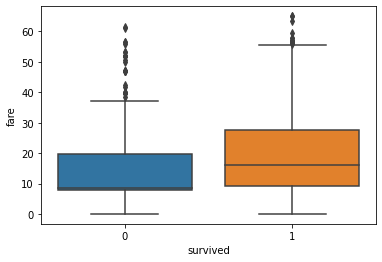

In [45]:
sns.boxplot(data = df_new3, x = 'survived',y = 'fare')

The distributions do cross over but survived tend to have higher fares. Maybe include. What is the p-value??

In [46]:
from scipy import stats

In [47]:
pearson_coef, p_value = stats.pearsonr(df_new3['fare'], df_new3 ['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.26055683253477435  with a P-value of P = 1.1832638962059915e-12


Low p-value, statistically significant, but weak relationship, include in model. 

Others are more difficult to visualise because there are two lots of categorical variables. Let's try using group by instead. 

In [48]:
df_group_one=df_new3[['survived', 'sex']]

In [49]:
df_group_one=df_group_one.groupby(['sex'],as_index= False).mean()
df_group_one

,sex,survived
0,0,0.171429
1,1,0.688312


It does look like females were more likely to survive. What's the p-value??

In [50]:
pearson_coef, p_value = stats.pearsonr(df_new3['sex'], df_new3 ['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5102456274957139  with a P-value of P = 4.7727078605735494e-49


p value is low so looks statistically significant, include in model.

In [51]:
df_group_two=df_new3[['survived', 'pclass_1', 'pclass_2', 'pclass_3']]

In [52]:
df_group_two = df_group_two.groupby(['pclass_1', 'pclass_2', 'pclass_3'],as_index= False).mean()
df_group_two

,pclass_1,pclass_2,pclass_3,survived
0,0,0,1,0.240260
1,0,1,0,0.475610
2,1,0,0,0.568421


Looks like those in pclass 1 were more likely to survive. p-value??

In [53]:
pearson_coef, p_value = stats.pearsonr(df_new3['pclass_1'], df_new3 ['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.1906934653839755  with a P-value of P = 2.4837439310796223e-07


p value is low so weak relationship looks statistically significant, include in model

In [54]:
df_group_three=df_new3[['survived', 'who_man', 'who_child', 'who_woman']]

In [55]:
df_group_three = df_group_three.groupby(['who_man', 'who_child', 'who_woman'],as_index= False).mean()
df_group_three

,who_man,who_child,who_woman,survived
0,0,0,1,0.695000
1,0,1,0,0.545455
2,1,0,0,0.158798


Women and children were more likely to survive. What's the p-value?

In [56]:
pearson_coef, p_value = stats.pearsonr(df_new3['who_woman'], df_new3 ['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.46920069013964083  with a P-value of P = 9.507850619700206e-41


Low p-value, statistically significant, include in model.

We've analysed the features and decided to use these columns in the final model: survived (as the label), pclass_1, pclass_2, pclass_3, sex, fare, who_man, who_child, who_woman.

In [57]:
df_new3.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,pclass_3,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,0,1
2,1,1,26.000000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,1
4,0,0,35.000000,0,0,8.0500,1,1,0,0,1,0,1,0,0,0,1
5,0,0,29.699118,0,0,8.4583,1,1,0,0,1,0,1,0,0,1,0


In [58]:
df_final = df_new3[['survived', 'pclass_1', 'pclass_2', 'pclass_3', 'sex','fare', 'who_child', 'who_man', 'who_woman']]
df_final.head(3)

,survived,pclass_1,pclass_2,pclass_3,sex,fare,who_child,who_man,who_woman
0,0,0,0,1,0,7.250,0,1,0
2,1,0,0,1,1,7.925,0,0,1
3,1,1,0,0,1,53.100,0,0,1


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#dividing the dataset into train and test.
x_train, x_test, y_train, y_test = train_test_split(df_final.iloc[:,1:9],df_final.iloc[:,0],test_size=0.2,random_state=42)

In [61]:
df_final.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((721, 9), (576, 8), (576,), (145, 8), (145,))

In [62]:
#Build logistic regression model
from sklearn.linear_model import LogisticRegression


In [63]:
model_logistic = LogisticRegression()

In [64]:
#fitting Logistic Regression to Training data
model_logistic.fit(x_train, y_train)

LogisticRegression()

In [65]:
# Make predictions on test data
predictions = model_logistic.predict(x_test)

In [66]:
# Accuracy measures how correct our predictions were. 
score = model_logistic.score(x_test, y_test)
print (score)

0.7793103448275862


In [67]:
# printing confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[80 15]
 [17 33]]


Decision tree next, I've already split the data so don't need to take those steps again

In [68]:
#import decision tree 
from sklearn import tree

In [69]:
# Create tree object.
model = tree.DecisionTreeClassifier(criterion='entropy')

In [70]:
#fitting Decision Tree Classification(Training Part)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [71]:
predictions2 = model.predict(x_test)

In [72]:
score2 = model.score(x_test, y_test)
print(score2)

0.7724137931034483


In [73]:
matrix = confusion_matrix(y_test, predictions2)
print(matrix)

[[81 14]
 [19 31]]


77.2 compared to 77.9 for logistic regression. Not much difference.

Random forest next. 

In [74]:
#Import Random Forest library
from sklearn.ensemble import RandomForestClassifier

100 estimators seems sensible with the amount of data we have

In [75]:
# Create Random Forest object
model2= RandomForestClassifier(n_estimators=100)

In [76]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [77]:
predictions3= model2.predict(x_test)

In [78]:
score3 = model2.score(x_test, y_test)
print(score3)

0.7931034482758621


Score has improved a bit for random forest, up from 77.2 for decision tree and 77.9 for logistic regression.

In [79]:
matrix = confusion_matrix(y_test, predictions3)
print(matrix)

[[78 17]
 [13 37]]


Lastly, gradient boosting machine.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gb_clf = GradientBoostingClassifier(n_estimators=5, random_state=0)

In [82]:
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=5, random_state=0)

In [83]:
print("Accuracy score: {0:.3f}".format(gb_clf.score(x_test, y_test)))

Accuracy score: 0.779


Score is 77.9, same as logistic regression. 

In [84]:
predictions4 = gb_clf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions4))

Confusion Matrix:
[[93  2]
 [30 20]]


Summary of accuracy results:
Logistic regression - 77.9
Decision Tree - 77.2
Random Forest - 79.3
Gradient Boosting Machine - 77.9 

It would be interesting to see how the accuracy of the algorithms changes in different situations. For example, what would happen if we didn't remove outliers? What would happen if we chose different features to include in our model?

I tried not removing outliers in a copy of this notebook (keeping everything else the same). The accuracy metrics changed more than I expected: Logistic regression - 79.3 Decision Tree - 83.2 Random Forest - 83.2 Gradient Boosting Machine - 77.7. 170 rows were deleted when I removed outliers which is a lot of data. In this case it would have been a better approach to only remove extreme outliers or not remove any outliers at all. 

When I selected features for the model above I looked at the correlation with label and chose those with a high, statistically significant correlation. My concern was that I dismissed some features straightaway which didn't have high correlation with the label but did have high correlation with other features that I chose. In another copy of this notebook I included the alone column in my final model because it had high, statisically significant correlation with fare, who_man and who_woman. When I ran the algorithms again my accuracy metrics were surprisingly lower than my first attempt. Logistic regression - 75.9, Decision Tree - 76.5, Random Forest - 77.9, Gradient Boosting Machine - 77.9. I'm not sure why and would need to investigate further. 